In [2]:
import pandas as pd
import matplotlib.pyplot as pyp


In [5]:
amazon = pd.read_csv('updated_amazon.csv')
flipkart = pd.read_csv('updated_flipkart.csv')
meesho = pd.read_csv('updated_messho.csv')

/var/folders/cg/3bcrcktx2pd2r4xs8f88t3lc0000gn/T/ipykernel_19954/1911337598.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon = pd.read_csv('updated_amazon.csv')
/var/folders/cg/3bcrcktx2pd2r4xs8f88t3lc0000gn/T/ipykernel_19954/1911337598.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  flipkart = pd.read_csv('updated_flipkart.csv')


In [8]:
meesho.shape

(86327, 16)

### page 1

In [27]:
meesho.columns

Index(['Unnamed: 0', 'ReasonforCreditEntry', 'SubOrderNo', 'OrderDate',
       'CustomerState', 'ProductName', 'Size', 'Quantity',
       'SupplierListedPrice', 'SupplierDiscountedPrice', 'discount',
       'Product_Name', 'Year', 'TotalCost', 'Month', 'CustomerState_cleaned'],
      dtype='object')

In [28]:
amazon.columns

Index(['Unnamed: 0', 'purchase_date', 'last_updated_date', 'order_status',
       'fulfillment_channel', 'sales_channel', 'ship_service_level',
       'product_name', 'quantity', 'currency', 'ship_city', 'ship_state',
       'ship_postal_code', 'is_business_order', 'account_id', 'total_cost',
       'Product_name', 'delivery_time', 'delivery_days', 'delivery_days_bin'],
      dtype='object')

In [29]:
flipkart.columns

Index(['Unnamed: 0', 'fulfilment_source', 'fulfilment_type', 'order_date',
       'order_approval_date', 'order_item_status', 'product_title',
       'order_quantity', 'pickup_logistics_partner', 'order_cancellation_date',
       'order_return_approval_date', 'procurement_dispatch_sla',
       'dispatch_after_date', 'dispatch_by_date',
       'order_ready_for_dispatch_on_date', 'dispatched_date',
       'dispatch_sla_breached', 'seller_pickup_reattempts', 'delivery_sla',
       'deliver_by_date', 'order_delivery_date', 'delivery_sla_breached',
       'Product_Name', 'time_taken', 'year', 'month'],
      dtype='object')

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date columns to datetime
meesho['OrderDate'] = pd.to_datetime(meesho['OrderDate'], errors='coerce')
flipkart['order_approval_date'] = pd.to_datetime(flipkart['order_approval_date'], errors='coerce')
amazon['purchase_date'] = pd.to_datetime(amazon['purchase_date'], errors='coerce')

def plot_line_graph_for_year(df1, df2, df3, year, category):
    # Prepare the color palette
    color_palette = ['#cb997e', '#eddcd2', '#a5a58d']

    plt.figure(figsize=(12, 8))
    
    # Plot for Meesho
    df_year_meesho = df1[df1['OrderDate'].dt.year == year]
    df_category_year_meesho = df_year_meesho[df_year_meesho['Product_Name'] == category]
    monthly_counts_meesho = df_category_year_meesho.groupby(df_category_year_meesho['OrderDate'].dt.to_period('M')).size()
    plt.plot(monthly_counts_meesho.index.to_timestamp(), monthly_counts_meesho.values,
             marker='o', color=color_palette[0], linewidth=2.5, label=f'Meesho - {category}')

    # Plot for Flipkart
    df_year_flipkart = df2[df2['order_approval_date'].dt.year == year]
    df_category_year_flipkart = df_year_flipkart[df_year_flipkart['Product_Name'] == category]
    monthly_counts_flipkart = df_category_year_flipkart.groupby(df_category_year_flipkart['order_approval_date'].dt.to_period('M')).size()
    plt.plot(monthly_counts_flipkart.index.to_timestamp(), monthly_counts_flipkart.values,
             marker='o', color=color_palette[1], linewidth=2.5, label=f'Flipkart - {category}')

    # Plot for Amazon
    df_year_amazon = df3[df3['purchase_date'].dt.year == year]
    df_category_year_amazon = df_year_amazon[df_year_amazon['Product_name'] == category]
    monthly_counts_amazon = df_category_year_amazon.groupby(df_category_year_amazon['purchase_date'].dt.to_period('M')).size()
    plt.plot(monthly_counts_amazon.index.to_timestamp(), monthly_counts_amazon.values,
             marker='o', color=color_palette[2], linewidth=2.5, label=f'Amazon - {category}')

    # Set custom x-tick labels for months
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    x_ticks = sorted(set(monthly_counts_meesho.index.to_timestamp()).union(
                     set(monthly_counts_flipkart.index.to_timestamp())).union(
                     set(monthly_counts_amazon.index.to_timestamp())))

    plt.xticks(ticks=x_ticks, labels=months[:len(x_ticks)], rotation=45, fontsize=30)

    # Display counts on the graph
    for x, count in zip(monthly_counts_meesho.index.to_timestamp(), monthly_counts_meesho.values):
        plt.text(x, count, str(count), ha='center', va='bottom', fontsize=20, fontweight='bold', color='black')
    
    for x, count in zip(monthly_counts_flipkart.index.to_timestamp(), monthly_counts_flipkart.values):
        plt.text(x, count, str(count), ha='center', va='bottom', fontsize=20, fontweight='bold', color='black')
    
    for x, count in zip(monthly_counts_amazon.index.to_timestamp(), monthly_counts_amazon.values):
        plt.text(x, count, str(count), ha='center', va='bottom', fontsize=20, fontweight='bold', color='black')

    # Turn off y-axis ticks and set labels
    plt.yticks(visible=False)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('')

    plt.grid(False)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print monthly counts for each DataFrame
    print('Meesho Monthly Counts:')
    print(monthly_counts_meesho)
    print('Flipkart Monthly Counts:')
    print(monthly_counts_flipkart)
    print('Amazon Monthly Counts:')
    print(monthly_counts_amazon)

# Example usage (assuming you have already loaded your DataFrames):
# plot_line_graph_for_year(meesho, flipkart, amazon, 2023, 'Some Category')


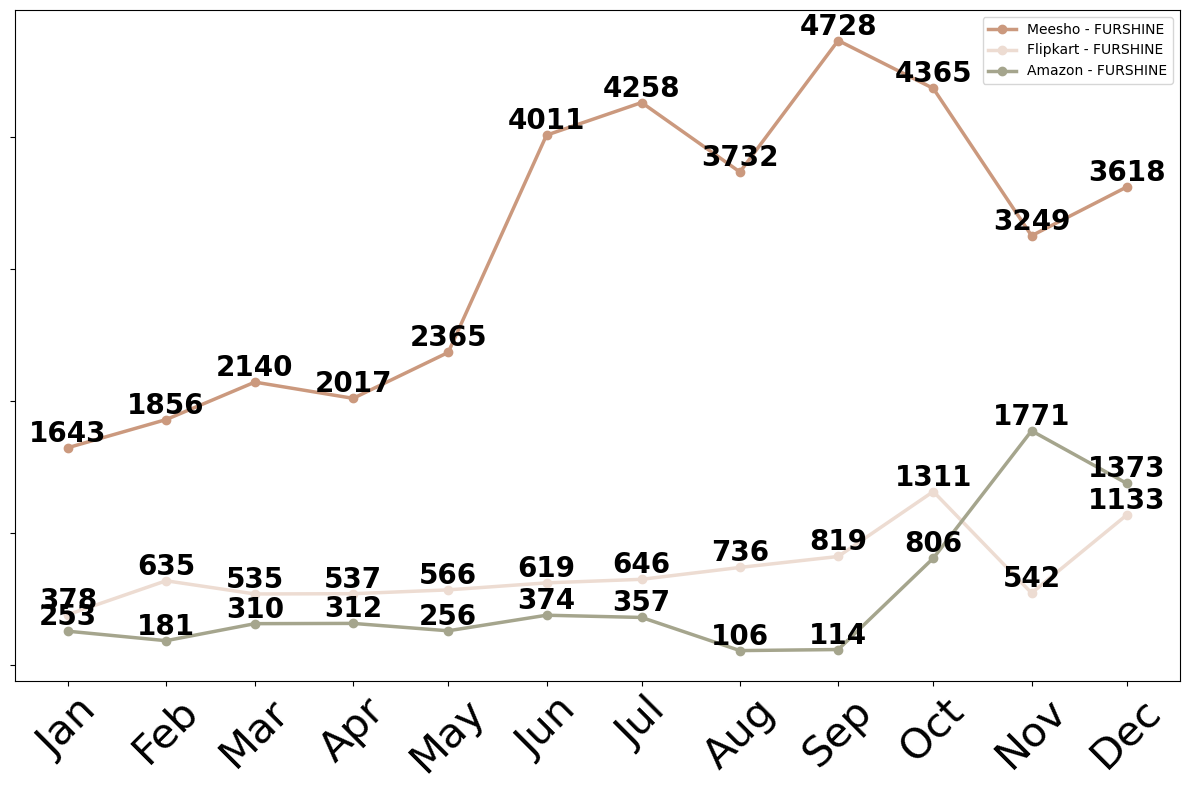

Meesho Monthly Counts:
OrderDate
2023-01    1643
2023-02    1856
2023-03    2140
2023-04    2017
2023-05    2365
2023-06    4011
2023-07    4258
2023-08    3732
2023-09    4728
2023-10    4365
2023-11    3249
2023-12    3618
Freq: M, dtype: int64
Flipkart Monthly Counts:
order_approval_date
2023-01     378
2023-02     635
2023-03     535
2023-04     537
2023-05     566
2023-06     619
2023-07     646
2023-08     736
2023-09     819
2023-10    1311
2023-11     542
2023-12    1133
Freq: M, dtype: int64
Amazon Monthly Counts:
purchase_date
2023-01     253
2023-02     181
2023-03     310
2023-04     312
2023-05     256
2023-06     374
2023-07     357
2023-08     106
2023-09     114
2023-10     806
2023-11    1771
2023-12    1373
Freq: M, dtype: int64


In [64]:
plot_line_graph_for_year(meesho,flipkart,amazon, 2023, 'FURSHINE')

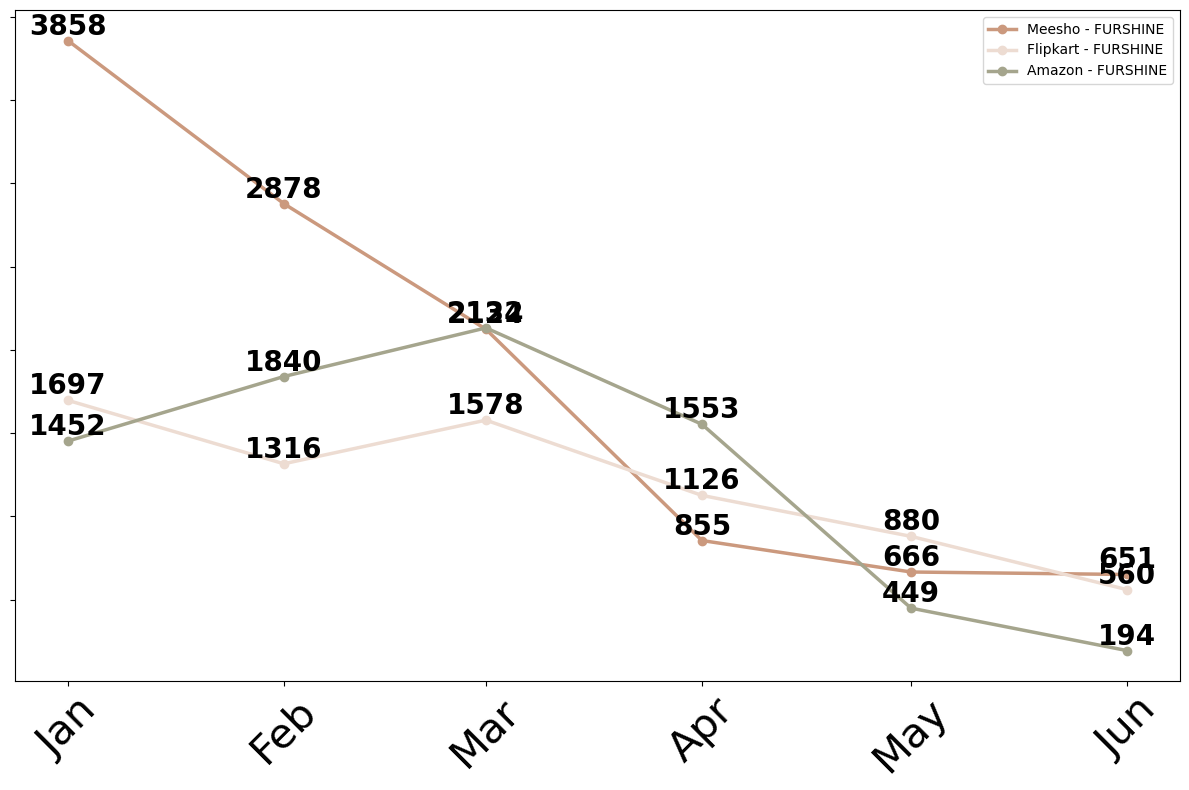

Meesho Monthly Counts:
OrderDate
2024-01    3858
2024-02    2878
2024-03    2124
2024-04     855
2024-05     666
2024-06     651
Freq: M, dtype: int64
Flipkart Monthly Counts:
order_approval_date
2024-01    1697
2024-02    1316
2024-03    1578
2024-04    1126
2024-05     880
2024-06     560
Freq: M, dtype: int64
Amazon Monthly Counts:
purchase_date
2024-01    1452
2024-02    1840
2024-03    2132
2024-04    1553
2024-05     449
2024-06     194
Freq: M, dtype: int64


In [65]:
plot_line_graph_for_year(meesho,flipkart,amazon, 2024, 'FURSHINE')

Percentages of top 5 and 'Others':
FURSHINE             38.227625
KINGONE              13.382281
BOXN                 12.828847
FLIPKART SMARTBUY    10.118084
WHITECHERRY           3.497221
Others               21.945942
dtype: float64


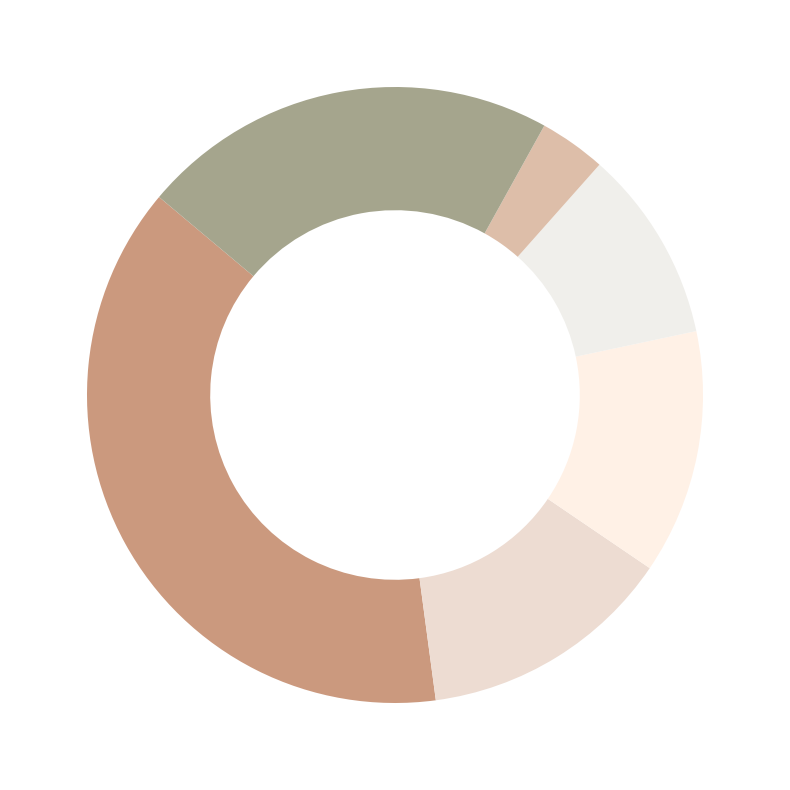

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your datasets into DataFrames
# df_amazon, df_flipkart, df_meesho

# Step 1: Combine product names and count occurrences
product_names_amazon = amazon['Product_name']
product_names_flipkart = flipkart['Product_Name']
product_names_meesho = meesho['Product_Name']

# Create a combined DataFrame
combined_products = pd.concat([product_names_amazon, product_names_flipkart, product_names_meesho])

# Count occurrences
word_counts = combined_products.value_counts()

# Step 2: Get top 5 and remaining as 'Others'
word_counts_top5 = word_counts.nlargest(5)
others_count = word_counts[~word_counts.index.isin(word_counts_top5.index)].sum()
word_counts_combined = pd.concat([word_counts_top5, pd.Series({'Others': others_count})])

# Calculate percentages
percentages_combined = (word_counts_combined / word_counts_combined.sum()) * 100

# Print the percentages
print("Percentages of top 5 and 'Others':")
print(percentages_combined)

# Step 3: Define the color palette
colors = ['#cb997e', '#eddcd2', '#fff1e6', '#f0efeb', '#ddbea9', '#a5a58d']

# Step 4: Plotting the annular pie chart
plt.figure(figsize=(10, 10))

wedges, texts = plt.pie(
    word_counts_combined,
    labels=None,  # No labels
    autopct=None,
    startangle=140,
    colors=colors[:len(word_counts_combined)],
    wedgeprops={'width': 0.4},  # Makes it an annular pie chart
)

# Make face color transparent
plt.gca().set_facecolor((0, 0, 0, 0))

# Step 5: Add a title
plt.title('')

# Step 6: Display the pie chart
plt.show()
